## Imports:

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Data and Exploration:

In [29]:
iris = pd.read_csv("iris.data", names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])
iris = iris.drop(index=0).reset_index(drop=True)
iris['Species'] = iris['Species'].map({'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2})
print(iris.head())
print(iris.info())
print(iris.describe())

   Sepal Length  Sepal Width  Petal Length  Petal Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       Sepal Length  Sepal Width  Petal Length  Petal Width     Species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean  

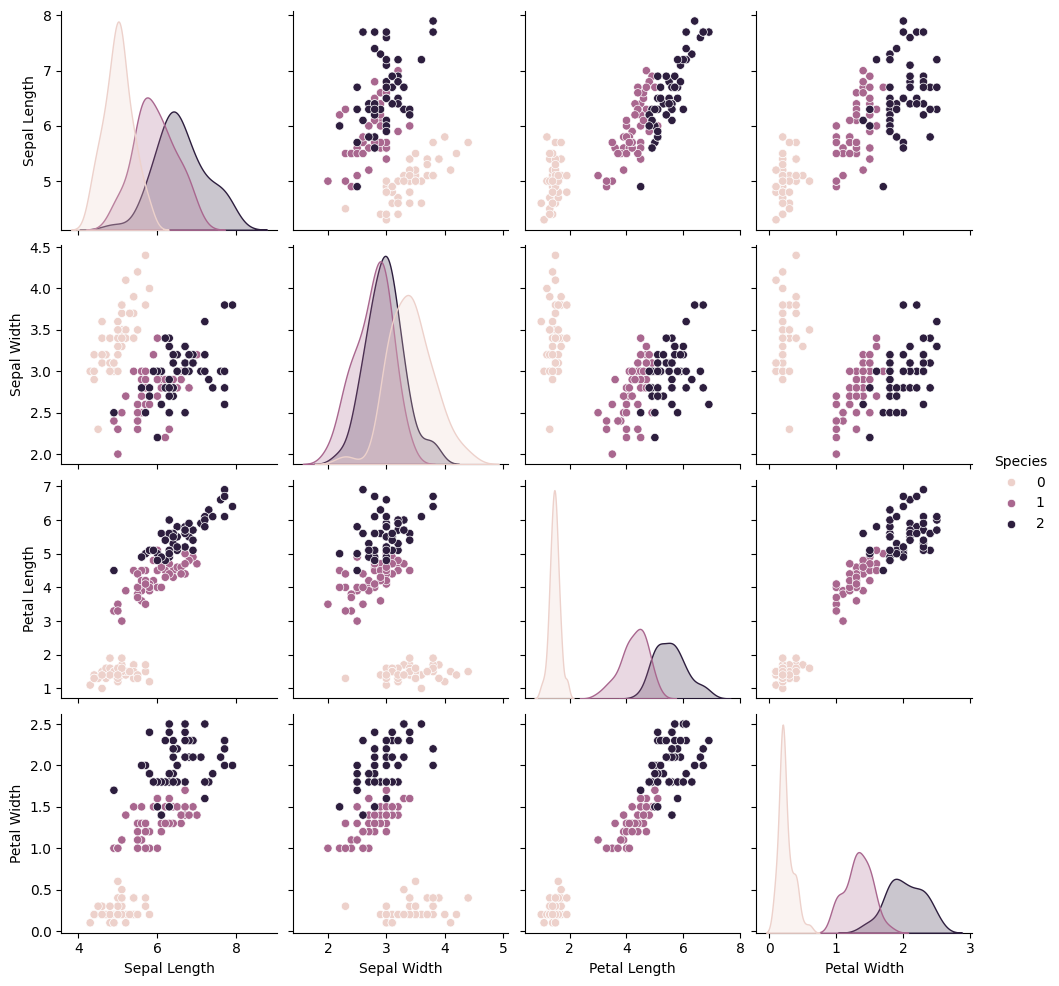

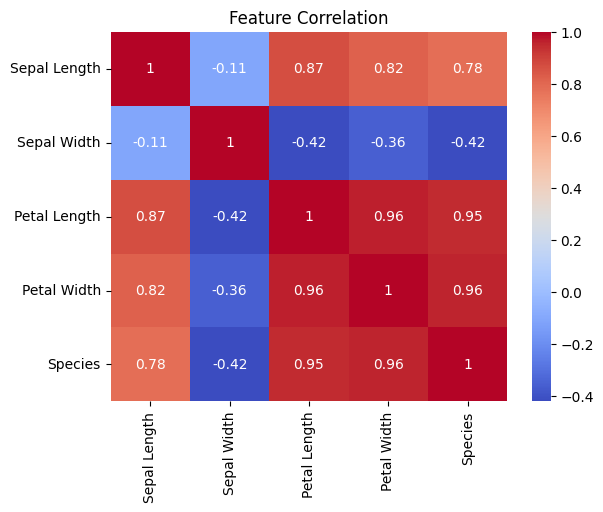

In [30]:
# Visualize the pairplot
sns.pairplot(iris, hue='Species', diag_kind='kde')
plt.show()
# Check correlation between features
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

**Key insights:** Visualizations like pair plots can help identify separability between classes. Correlation heatmaps show relationships between features and can help with feature selection.

## Testing of Models:

I remove the Petal Width and Petal Length columns because all the models show 1 accuracy on this data with this columns and I cant come to conclusions on the models because of high correlation between them to target Species.


---



We will test various classification models, including: Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, Gradient Boosting (e.g., XGBoost), Support Vector Machines and Naive Bayes Classifier

In [39]:
X = iris[["Sepal Length", "Sepal Width"]]
y = iris["Species"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.90
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

K-Nearest Neighbors Accuracy: 0.80
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

Decision Tree Accuracy: 0.63
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0

## Compare between classification models:

                    Model  Accuracy
0     Logistic Regression  0.900000
5  Support Vector Machine  0.900000
6             Naive Bayes  0.900000
3           Random Forest  0.833333
4       Gradient Boosting  0.833333
1     K-Nearest Neighbors  0.800000
2           Decision Tree  0.633333


<ipython-input-41-0e49b47a2ec9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=comparison, palette='viridis')


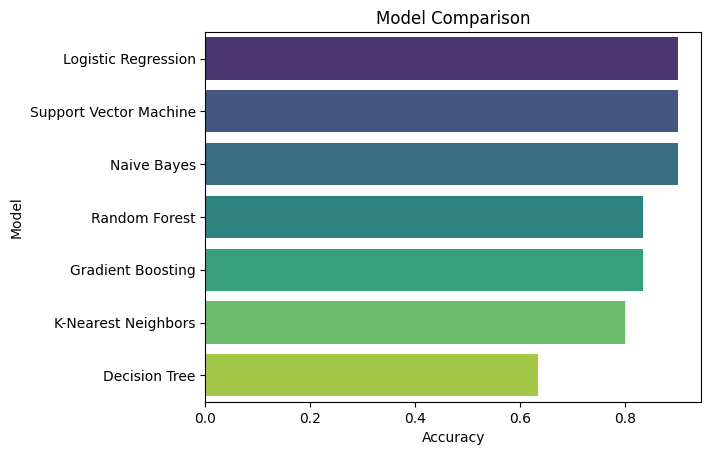

In [41]:
# Compare model accuracies
comparison = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
comparison = comparison.sort_values(by='Accuracy', ascending=False)
print(comparison)

# Plot the comparison
sns.barplot(x='Accuracy', y='Model', data=comparison, palette='viridis')
plt.title("Model Comparison")
plt.show()

**Explaination:** The output will list each model's accuracy, helping identify the best-performing model. As we can see, Logistic Regression, SVM and Naive Bayes did te best work on IRIS dataset.

**Conclusions:** As we can see, Logistic Regression, SVM and Naive Bayes did the best work on IRIS dataset because they get the best accuracies and more over that all the Species were seperated great from each other. In the end, their are some columns that high correleted to target that we need to ignore them when we examine models.


---



I can add Fine-Tuning to each model that the model will be more accurate (Take for example KNN):

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 31),  # Test values from 1 to 30
    'weights': ['uniform', 'distance'],  # Uniform vs distance-based weights
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_knn = grid_search.best_estimator_

# Evaluate the tuned KNN on the test set
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTuned KNN Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}

Tuned KNN Accuracy: 0.80
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



**Addition from teoretical exercise:**

In [50]:
import numpy as np
from collections import Counter
def k_nearest_neighbor(X_train, y_train, X_test, k):
  X_train = X_train.astype(float)
  X_test = X_test.astype(float)
  y_train = np.array(y_train)
  predictions = []
  assert k <= len(X_train), "k can't be larger than number of samples."
  for test_point in X_test:
      distances = np.linalg.norm(X_train - test_point, axis=1)
      k_indices = np.argsort(distances)[:k]
      k_nearest_labels = y_train[k_indices]
      most_common = Counter(k_nearest_labels).most_common(1)[0][0]
      predictions.append(most_common)
  return predictions

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {}".format(accuracy))


The accuracy of our classifier is 0.8
